In [1]:
from dotenv import find_dotenv, load_dotenv
try:
    dotenv_path = find_dotenv(raise_error_if_not_found=True)
except IOError:
    dotenv_path = find_dotenv(raise_error_if_not_found=True, usecwd=True)
load_dotenv(dotenv_path)
import os
import sys
sys.path.append(os.path.join(os.environ.get('PROJECT_PATH'), 'src'))
sys.path.append(os.path.join(os.environ.get('PROJECT_PATH'), 'src', 'SupportingClasses'))
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from seaborn import heatmap
%matplotlib notebook
from Bio.Phylo import draw
from Bio.Align import MultipleSeqAlignment
from Trace import load_numpy_array
from SeqAlignment import SeqAlignment
from PDBReference import PDBReference
from EvolutionaryTrace import EvolutionaryTrace
from ContactScorer import ContactScorer, plot_z_scores

In [2]:
input_dir = os.environ.get('INPUT_PATH')
output_dir = os.environ.get('OUTPUT_PATH')
small_set_out_dir = os.path.join(output_dir, 'SmallTestSet')
etmip_dir = os.path.join(small_set_out_dir, 'ET-MIp')
max_dir = os.path.join(small_set_out_dir, 'ET-MIp_MAX')
temp_dir = os.path.abspath('/home/daniel/Desktop/comparison_dir')
os.makedirs(temp_dir, exist_ok=True)

In [3]:
aln = SeqAlignment(query_id='7hvp', file_name=os.path.join(etmip_dir, '7hvp',
                                                           'Original_Alignment.fa'))
aln.import_alignment()
aln_nongap = SeqAlignment(query_id='7hvp', file_name=os.path.join(etmip_dir, '7hvp',
                                                           'Non-Gapped_Alignment.fa'))
aln_nongap.import_alignment()
pdb_structure = PDBReference(pdb_file=os.path.join(input_dir, 'PDB', 'hv', 'pdb7hvp.ent'))
pdb_structure.import_pdb(structure_id='7hvp') 

Importing the PDB file took 0.0010943810145060222 min


/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2100.
  PDBConstructionWarning)
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2138.
  PDBConstructionWarning)
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2191.
  PDBConstructionWarning)


In [4]:
etmip_scorer = ContactScorer(query='7hvp', seq_alignment=aln_nongap, pdb_reference=pdb_structure,
                             cutoff=8.0)
etmip_scorer.best_chain = 'A'
etmip_scorer.fit()
etmip_scorer.measure_distance(method='CB')
max_scorer = ContactScorer(query='7hvp', seq_alignment=aln_nongap, pdb_reference=pdb_structure,
                           cutoff=8.0)
max_scorer.best_chain = 'A'
max_scorer.fit()
max_scorer.measure_distance(method='CB')

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2100.
  PDBConstructionWarning)
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2138.
  PDBConstructionWarning)
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2191.
  PDBConstructionWarning)


Removing gaps took 9.903907775878906e-05 min
Importing the PDB file took 0.00046417713165283205 min
Mapping query sequence and pdb took 0.000807178020477295 min
Constructing internal representation took 0.021925294399261476 min
Computing the distance matrix based on the PDB file took 0.009121954441070557 min
Removing gaps took 9.067455927530924e-05 min
Importing the PDB file took 0.0004373311996459961 min
Mapping query sequence and pdb took 0.0007423837979634603 min


/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2100.
  PDBConstructionWarning)
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2138.
  PDBConstructionWarning)
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2191.
  PDBConstructionWarning)


Constructing internal representation took 0.02281490166982015 min
Computing the distance matrix based on the PDB file took 0.008344411849975586 min


Removing gaps took 0.0005335450172424316 min
Evolutionary Trace analysis with the same parameters already saved to this location.
0.01622939109802246
Removing gaps took 0.0005259394645690918 min
Evolutionary Trace analysis with the same parameters already saved to this location.
0.022076129913330078


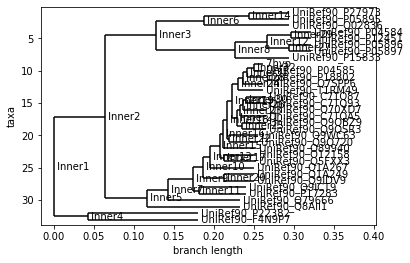

<Figure size 432x288 with 0 Axes>

In [5]:
etmip_pred = EvolutionaryTrace(query='7hvp', polymer_type='Protein', aln_file=aln.file_name,
                               et_distance=True, distance_model='blosum62',
                               tree_building_method='et', tree_building_options={}, ranks=None,
                               position_type='pair',
                               scoring_metric='filtered_average_product_corrected_mutual_information',
                               gap_correction=None, maximize=False,
                               out_dir=os.path.join(etmip_dir, '7hvp'),
                               output_files={'original_aln', 'non_gap_aln', 'tree', 'scores'},
                               processors=10, low_memory=True)
etmip_pred.calculate_scores()
etmip_scorer.map_predictions_to_pdb(ranks=etmip_pred.rankings, predictions=etmip_pred.scores,
                                    coverages=etmip_pred.coverages, threshold=0.5) 
max_pred = EvolutionaryTrace(query='7hvp', polymer_type='Protein', aln_file=aln.file_name,
                             et_distance=True, distance_model='blosum62', tree_building_method='et',
                             tree_building_options={}, ranks=None, position_type='pair',
                             scoring_metric='filtered_average_product_corrected_mutual_information',
                             gap_correction=None, maximize=True,
                             out_dir=os.path.join(max_dir, '7hvp'),
                             output_files={'original_aln', 'non_gap_aln', 'tree', 'scores'},
                             processors=10, low_memory=True) 
max_pred.calculate_scores()
max_scorer.map_predictions_to_pdb(ranks=max_pred.rankings, predictions=max_pred.scores,
                                  coverages=max_pred.coverages, threshold=0.5)
draw(etmip_pred.phylo_tree.tree)
plt.savefig(os.path.join(temp_dir, 'Tree_Vis.png'))
plt.clf()

In [6]:
comp_df = etmip_scorer.data.merge(max_scorer.data, on=['Seq Pos 1', 'Seq AA 1', 'Seq Pos 2',
                                                       'Seq AA 2', 'Seq Separation Category',
                                                       'Seq Separation', 'Struct Pos 1', 'Struct AA 1',
                                                       'Struct Pos 2', 'Struct AA 2', 'Distance',
                                                       'Contact (within 8.0A cutoff)'],
                                  suffixes=('_ET-MIp', '_MAX'))
comp_df['RANK_DELTA'] = comp_df['Rank_ET-MIp'] - comp_df['Rank_MAX']
comp_df['SCORE_DELTA'] = comp_df['Score_ET-MIp'] - comp_df['Score_MAX']
sorted_df = comp_df.sort_values(by=['Contact (within 8.0A cutoff)', 'SCORE_DELTA'])
sorted_df.to_csv(os.path.join(temp_dir, 'merged_data.csv'), sep='\t', index=False, header=True)
sub_df = sorted_df.loc[(sorted_df['Struct Pos 1'] != '-') & (sorted_df['Struct Pos 2'] != '-'), :]
sub_df.to_csv(os.path.join(temp_dir, 'merged_restricted_data.csv'), sep='\t', index=False, header=True)
print(sub_df.loc[sub_df['Contact (within 8.0A cutoff)'] == False, :])
print(sub_df.loc[sub_df['Contact (within 8.0A cutoff)'] == True, :])

        Seq Pos 1 Seq AA 1  Seq Pos 2 Seq AA 2 Struct Pos 1 Struct AA 1  \
612709        521        V        535        M           32           V   
584831        491        Q        542        F            2           Q   
602634        510        E        580        T           21           E   
621834        531        W        565        L           42           W   
621814        531        W        545        V           42           W   
...           ...      ...        ...      ...          ...         ...   
664119        579        L        586        L           90           L   
664975        580        T        586        L           91           T   
665830        581        Q        586        L           92           Q   
666684        582        I        586        L           93           I   
667537        583        G        586        L           94           G   

       Struct Pos 2 Struct AA 2  Seq Separation Seq Separation Category  ...  \
612709           46

In [7]:
def visualize_trace_pair(paired_aln, assignments, pair_dir):
    # Trying to build tree image of all sub alignments
    # What is the minimum size of a plot in the grid? The size of a plot that holds one sequence (so one
    # row) and 2 positions (so two amino acid columns).
    # Start by specifying cell size and margins
    cellsize = 0.0001  # inch
#     marg_top = 0.7
    marg_top = 0.0
#     marg_bottom = 0.7
    marg_bottom = 0.0
#     marg_left = 0.7
    marg_left = 0.
    
#     marg_right = 0.7
    marg_right = 0.0
    # number of cells along width
    cells_in_row = 2
    # Determine figure width
    sub_fig_width = cellsize * cells_in_row + marg_left + marg_right
    print('SUB FIG WIDTH: {}'.format(sub_fig_width))
    # Number of cells along height
    cells_in_column = 1
    # Calculate figure height in inches
    sub_fig_height = cellsize * cells_in_column + marg_top + marg_bottom
    print('SUB FIG HEIGHT: {}'.format(sub_fig_height))
    # Set the number of columns and rows
    num_rows = paired_aln.size
    num_cols = paired_aln.size
    # column and row spacing
    col_spacing = 2.0
    row_spacing = 0.5
    # Caclulate figure width and height
    fig_width = (num_cols * sub_fig_width) + ((num_cols - 1) * col_spacing)
    print('FIG WIDTH: {}'.format(fig_width))
    fig_height = (num_rows * sub_fig_height) + ((num_rows - 1) * row_spacing)
    print('FIG HEIGHT: {}'.format(fig_height))
    # Set figure size
    fig = plt.figure(figsize=(fig_width, fig_height))
    # Set up the grid of figures to be filled in
    gs = GridSpec(nrows=paired_aln.size, ncols=paired_aln.size, wspace=col_spacing, hspace=row_spacing)
    # Create plotting axes and fill with blank figures to establish the size of the plotting area
    plotting_data = {}
    for r in [1, 2, 3]:
#     for r in sorted(assignments.keys()):
        plotting_data[r] = {}
        starting_gs_pos = 0
        print('Rank {}'.format(r))
        for g in sorted(assignments[r].keys()):
            plotting_data[r][g] = {}
            print('Starting GridSpec Position: {}'.format(starting_gs_pos))
            plotting_data[r][g]['aln'] = paired_aln.generate_sub_alignment(
                sequence_ids=assignments[r][g]['terminals'])
            plotting_data[r][g]['ax'] = fig.add_subplot(gs[starting_gs_pos: starting_gs_pos + plotting_data[r][g]['aln'].size, r - 1])
            
            hm = heatmap(data=np.zeros((plotting_data[r][g]['aln'].size, 2)), cmap=cm.Greys,
                         center=10.0, vmin=0.0, vmax=20.0, cbar=False, square=True,
                         xticklabels=False, yticklabels=False, ax=plotting_data[r][g]['ax'])
            hm.tick_params(left=False, bottom=False)
            hm.set_title('Rank {} Group {}'.format(r, g), color='w')
            starting_gs_pos += plotting_data[r][g]['aln'].size
    fig.savefig(os.path.join(pair_dir, 'BASE_Figure.png'))
    # Fill in the figures and save at each rank
    for r in [1, 2, 3]:
#     for r in sorted(assignments.keys()):
        for g in sorted(assignments[r].keys()):
            print('Rank{}Group{}'.format(r, g))
            plotting_data[r][g]['ax'].clear()
            plotting_data[r][g]['aln'].heatmap_plot(name='Rank {} Group {}'.format(r, g),
                                                    out_dir=pair1_dir, save=False,
                                                    ax=plotting_data[r][g]['ax'])
            if r > 1:
                plotting_data[r][g]['ax'].set_xticklabels([None] * 2)
                plotting_data[r][g]['ax'].set_yticklabels([None] * plotting_data[r][g]['aln'].size)
        fig.savefig(os.path.join(pair_dir, 'Rank_{}_progress.png'.format(r)), bbox_inches='tight')

MGARASVLSGGELDKWEKIRLRPGGKKKYKLKHIVWASRELERFAVNPGLLETSEGCRQILGQLQPSLQTGSEELRSLYNTVATLYCVHQRIDVKDTKEALEKIEEEQNKSKKKAQQAAAAAGTGNSSQVSQNYPIVQNLQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEGATPQDLNTMLNTVGGHQAAMQMLKETINEEAAEWDRVHPVHAGPIAPGQMREPRGSDIAGTTSTLQEQIGWMTNNPPIPVGEIYKRWIILGLNKIVRMYSPTSILDIRQGPKEPFRDYVDRFYKTLRAEQASQDVKNWMTETLLVQNANPDCKTILKALGPAATLEEMMTACQGVGGPGHKARVLAEAMSQVTNPANIMMQRGNFRNQRKTVKCFNCGKEGHIAKNCRAPRKKGCWRCGREGHQMKDCTERQANFLREDLAFLQGKAREFSSEQTRANSPTRRELQVWGGENNSLSEAGADRQGTVSFNFPQITLWQRPLVTIRIGGQLKEALLDTGADDTVLEEMNLPGKWKPKMIGGIGGFIKVRQYDQIPVEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNFPISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIMLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHEVYYDPSKDLVAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKVSTESIVIWGKIPKFKLPIQKETWEAWWMEYWQATWI

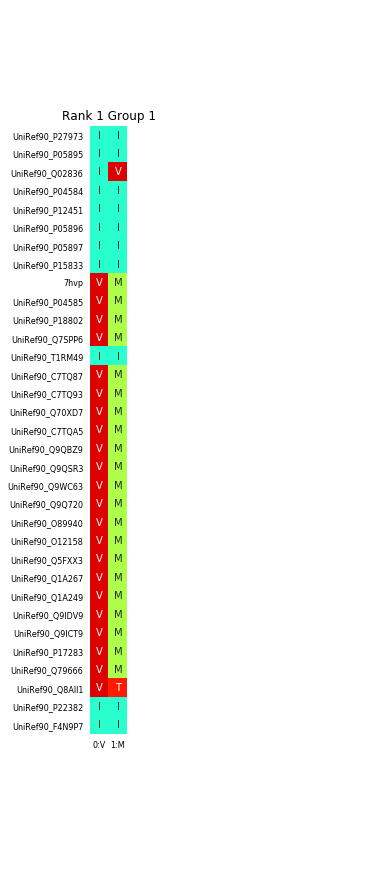

Plotting alignment took 0.01203982432683309 min
Rank2Group1
Plotting alignment took 0.0026084542274475097 min
Rank2Group2
Plotting alignment took 0.002365632851918538 min
Rank3Group1
Plotting alignment took 0.002160807450612386 min
Rank3Group2
Plotting alignment took 0.003045825163523356 min
Rank3Group3
Plotting alignment took 0.002613504727681478 min


In [8]:
pair1 = (521, 535)
pair1_dir = os.path.join(temp_dir, '{}-{}'.format(pair1[0], pair1[1]))
os.makedirs(pair1_dir, exist_ok=True)
pair1_aln = aln_nongap.generate_positional_sub_alignment([pair1[0], pair1[1]])
print(pair1_aln)
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair1_aln.seq_order)}
pair1_aln_to = deepcopy(pair1_aln)
pair1_aln_to.seq_order = tree_seq_order
pair1_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair1_aln.alignment[look_up[x], :])
                                               for x in pair1_aln_to.seq_order])
print(pair1_aln_to)
visualize_trace_pair(pair1_aln_to, etmip_pred.assignments, pair1_dir)
# data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
# for r in sorted(etmip_pred.assignments.keys()):
#     for g in sorted(etmip_pred.assignments[r].keys()):
#         print('Rank{}Group{}'.format(r, g))
#         data['Rank'].append(r)
#         data['Group'].append(g)
#         # Retrieve ET-MIp score for pair at current rank and group
#         etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
#                                      etmip_pred.low_memory)
#         data['ET-MIp'].append(etmip_mat[pair1[0], pair1[1]])
#         # Retrieve ET-MIp_MAX score for pair at current rank and group
#         max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
#                                    max_pred.low_memory)
#         data['ET-MIp_MAX'].append(max_mat[pair1[0], pair1[1]])
# pd.DataFrame(data).to_csv(os.path.join(pair1_dir, 'Score_Comparison.csv'), header=True, index=False,
#                           sep='\t')

MGARASVLSGGELDKWEKIRLRPGGKKKYKLKHIVWASRELERFAVNPGLLETSEGCRQILGQLQPSLQTGSEELRSLYNTVATLYCVHQRIDVKDTKEALEKIEEEQNKSKKKAQQAAAAAGTGNSSQVSQNYPIVQNLQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEGATPQDLNTMLNTVGGHQAAMQMLKETINEEAAEWDRVHPVHAGPIAPGQMREPRGSDIAGTTSTLQEQIGWMTNNPPIPVGEIYKRWIILGLNKIVRMYSPTSILDIRQGPKEPFRDYVDRFYKTLRAEQASQDVKNWMTETLLVQNANPDCKTILKALGPAATLEEMMTACQGVGGPGHKARVLAEAMSQVTNPANIMMQRGNFRNQRKTVKCFNCGKEGHIAKNCRAPRKKGCWRCGREGHQMKDCTERQANFLREDLAFLQGKAREFSSEQTRANSPTRRELQVWGGENNSLSEAGADRQGTVSFNFPQITLWQRPLVTIRIGGQLKEALLDTGADDTVLEEMNLPGKWKPKMIGGIGGFIKVRQYDQIPVEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNFPISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIMLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVKQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHEVYYDPSKDLVAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKVSTESIVIWGKIPKFKLPIQKETWEAWWMEYWQATWI

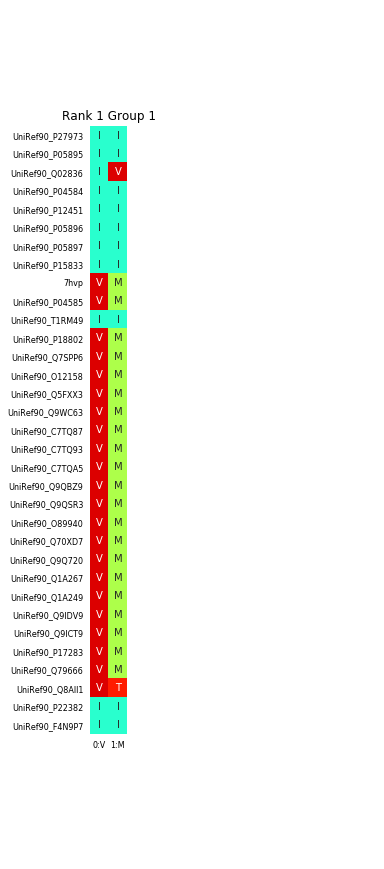

Plotting alignment took 0.01101234753926595 min
Rank2Group1
Plotting alignment took 0.0026088555653889975 min
Rank2Group2
Plotting alignment took 0.0018300334612528482 min
Rank3Group1
Plotting alignment took 0.002360554536183675 min
Rank3Group2
Plotting alignment took 0.002879476547241211 min
Rank3Group3
Plotting alignment took 0.0022582213083902993 min
Full visualization took 3.782261848449707 sec.


In [9]:
etmip_pred.visualize_trace(positions=[521, 535], ranks=[1,2,3])

In [21]:
pair2 = (491, 542)
pair2_dir = os.path.join(temp_dir, '{}-{}'.format(pair2[0], pair2[1]))
os.makedirs(pair2_dir, exist_ok=True)
pair2_aln = aln_nongap.generate_positional_sub_alignment(i=pair2[0], j=pair2[1])
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair2_aln.seq_order)}
pair2_aln_to = deepcopy(pair2_aln)
pair2_aln_to.seq_order = tree_seq_order
pair2_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair2_aln.alignment[look_up[x], :])
                                               for x in pair2_aln_to.seq_order])
visualize_trace_pair(pair2_aln_to, etmip_pred.assignments, pair2_dir)
data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
for r in sorted(etmip_pred.assignments.keys()):
    for g in sorted(etmip_pred.assignments[r].keys()):
        print('Rank{}Group{}'.format(r, g))
        data['Rank'].append(r)
        data['Group'].append(g)
        # Retrieve ET-MIp score for pair at current rank and group
        etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
                                     etmip_pred.low_memory)
        data['ET-MIp'].append(etmip_mat[pair2[0], pair2[1]])
        # Retrieve ET-MIp_MAX score for pair at current rank and group
        max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
                                   max_pred.low_memory)
        data['ET-MIp_MAX'].append(max_mat[pair2[0], pair2[1]])
pd.DataFrame(data).to_csv(os.path.join(pair2_dir, 'Score_Comparison.csv'), header=True, index=False,
                          sep='\t')

<IPython.core.display.Javascript object>

Rank 1
Starting GridSpec Position: 0
Rank 2
Starting GridSpec Position: 0
Starting GridSpec Position: 31
Rank 3
Starting GridSpec Position: 0
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 4
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 5
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 6
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 7
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 8
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Sta

Exception ignored in: <bound method Comm.__del__ of <ipykernel.comm.comm.Comm object at 0x7f02c54640b8>>
Traceback (most recent call last):
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('5e08c74f6dc34105a04bc62bfb721a80',)


Starting GridSpec Position: 25
Starting GridSpec Position: 27
Starting GridSpec Position: 28
Starting GridSpec Position: 29
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 18
Starting GridSpec Position: 0
Starting GridSpec Position: 1
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 5
Starting GridSpec Position: 7
Starting GridSpec Position: 8
Starting GridSpec Position: 21
Starting GridSpec Position: 22
Starting GridSpec Position: 23
Starting GridSpec Position: 24
Starting GridSpec Position: 25
Starting GridSpec Position: 27
Starting GridSpec Position: 28
Starting GridSpec Position: 29
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 19
Starting GridSpec Position: 0
Starting GridSpec Position: 1
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 5
Starting GridSpec Position: 7
Starting GridSpec Position: 8
Starti

In [25]:
pair3 = (582, 586)
pair3_dir = os.path.join(temp_dir, '{}-{}'.format(pair3[0], pair3[1]))
os.makedirs(pair3_dir, exist_ok=True)
pair3_aln = aln_nongap.generate_positional_sub_alignment(i=pair3[0], j=pair3[1])
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair3_aln.seq_order)}
pair3_aln_to = deepcopy(pair3_aln)
pair3_aln_to.seq_order = tree_seq_order
pair3_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair3_aln.alignment[look_up[x], :])
                                               for x in pair3_aln_to.seq_order])
visualize_trace_pair(pair3_aln_to, etmip_pred.assignments, pair3_dir)
data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
for r in sorted(etmip_pred.assignments.keys()):
    for g in sorted(etmip_pred.assignments[r].keys()):
        print('Rank{}Group{}'.format(r, g))
        data['Rank'].append(r)
        data['Group'].append(g)
        # Retrieve ET-MIp score for pair at current rank and group
        etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
                                     etmip_pred.low_memory)
        data['ET-MIp'].append(etmip_mat[pair3[0], pair3[1]])
        # Retrieve ET-MIp_MAX score for pair at current rank and group
        max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
                                   max_pred.low_memory)
        data['ET-MIp_MAX'].append(max_mat[pair3[0], pair3[1]])
pd.DataFrame(data).to_csv(os.path.join(pair3_dir, 'Score_Comparison.csv'), header=True, index=False,
                          sep='\t')

<IPython.core.display.Javascript object>

Rank 1
Starting GridSpec Position: 0
Rank 2
Starting GridSpec Position: 0
Starting GridSpec Position: 31
Rank 3
Starting GridSpec Position: 0
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 4
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 5
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 6
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 7
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 8
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Sta

Exception ignored in: <bound method Comm.__del__ of <ipykernel.comm.comm.Comm object at 0x7f0257a317b8>>
Traceback (most recent call last):
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('233780da089a4b638c72bb724c3f4536',)


Starting GridSpec Position: 27
Starting GridSpec Position: 29
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 12
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 7
Starting GridSpec Position: 8
Starting GridSpec Position: 25
Starting GridSpec Position: 27
Starting GridSpec Position: 28
Starting GridSpec Position: 29
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 13
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 5
Starting GridSpec Position: 7
Starting GridSpec Position: 8
Starting GridSpec Position: 25
Starting GridSpec Position: 27
Starting GridSpec Position: 28
Starting GridSpec Position: 29
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 14
Starting GridSpec Position: 0
Starting GridSpec Position:

In [26]:
pair4 = (583, 586)
pair4_dir = os.path.join(temp_dir, '{}-{}'.format(pair4[0], pair4[1]))
os.makedirs(pair4_dir, exist_ok=True)
pair4_aln = aln_nongap.generate_positional_sub_alignment(i=pair4[0], j=pair4[1])
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair4_aln.seq_order)}
pair4_aln_to = deepcopy(pair4_aln)
pair4_aln_to.seq_order = tree_seq_order
pair4_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair4_aln.alignment[look_up[x], :])
                                               for x in pair4_aln_to.seq_order])
visualize_trace_pair(pair4_aln_to, etmip_pred.assignments, pair4_dir)
data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
for r in sorted(etmip_pred.assignments.keys()):
    for g in sorted(etmip_pred.assignments[r].keys()):
        print('Rank{}Group{}'.format(r, g))
        data['Rank'].append(r)
        data['Group'].append(g)
        # Retrieve ET-MIp score for pair at current rank and group
        etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
                                     etmip_pred.low_memory)
        data['ET-MIp'].append(etmip_mat[pair4[0], pair4[1]])
        # Retrieve ET-MIp_MAX score for pair at current rank and group
        max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
                                   max_pred.low_memory)
        data['ET-MIp_MAX'].append(max_mat[pair4[0], pair4[1]])
pd.DataFrame(data).to_csv(os.path.join(pair4_dir, 'Score_Comparison.csv'), header=True, index=False,
                          sep='\t')

<IPython.core.display.Javascript object>

Rank 1
Starting GridSpec Position: 0
Rank 2
Starting GridSpec Position: 0
Starting GridSpec Position: 31
Rank 3
Starting GridSpec Position: 0
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 4
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 5
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 6
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 7
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 8
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Sta

Exception ignored in: <bound method Comm.__del__ of <ipykernel.comm.comm.Comm object at 0x7f02a13ce1d0>>
Traceback (most recent call last):
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('937becccb9584f7e9b5066a5e8c984d3',)


Starting GridSpec Position: 21
Starting GridSpec Position: 22
Starting GridSpec Position: 23
Starting GridSpec Position: 24
Starting GridSpec Position: 25
Starting GridSpec Position: 26
Starting GridSpec Position: 27
Starting GridSpec Position: 28
Starting GridSpec Position: 29
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 26
Starting GridSpec Position: 0
Starting GridSpec Position: 1
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 5
Starting GridSpec Position: 7
Starting GridSpec Position: 8
Starting GridSpec Position: 12
Starting GridSpec Position: 13
Starting GridSpec Position: 16
Starting GridSpec Position: 17
Starting GridSpec Position: 18
Starting GridSpec Position: 19
Starting GridSpec Position: 20
Starting GridSpec Position: 21
Starting GridSpec Position: 22
Starting GridSpec Position: 23
Starting GridSpec Position: 24
Starting GridSpec Position: 25
Starting GridSpec Position: 26
Startin

In [27]:
pair5 = (535, 544)
pair5_dir = os.path.join(temp_dir, '{}-{}'.format(pair5[0], pair5[1]))
os.makedirs(pair5_dir, exist_ok=True)
pair5_aln = aln_nongap.generate_positional_sub_alignment(i=pair5[0], j=pair5[1])
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair5_aln.seq_order)}
pair5_aln_to = deepcopy(pair5_aln)
pair5_aln_to.seq_order = tree_seq_order
pair5_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair5_aln.alignment[look_up[x], :])
                                               for x in pair5_aln_to.seq_order])
visualize_trace_pair(pair5_aln_to, etmip_pred.assignments, pair5_dir)
data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
for r in sorted(etmip_pred.assignments.keys()):
    for g in sorted(etmip_pred.assignments[r].keys()):
        print('Rank{}Group{}'.format(r, g))
        data['Rank'].append(r)
        data['Group'].append(g)
        # Retrieve ET-MIp score for pair at current rank and group
        etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
                                     etmip_pred.low_memory)
        data['ET-MIp'].append(etmip_mat[pair5[0], pair5[1]])
        # Retrieve ET-MIp_MAX score for pair at current rank and group
        max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
                                   max_pred.low_memory)
        data['ET-MIp_MAX'].append(max_mat[pair5[0], pair5[1]])
pd.DataFrame(data).to_csv(os.path.join(pair5_dir, 'Score_Comparison.csv'), header=True, index=False,
                          sep='\t')

<IPython.core.display.Javascript object>

Rank 1
Starting GridSpec Position: 0
Rank 2
Starting GridSpec Position: 0
Starting GridSpec Position: 31
Rank 3
Starting GridSpec Position: 0
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 4
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 5
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 6
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 7
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 8
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Sta

In [28]:
pair6 = (526, 528)
pair6_dir = os.path.join(temp_dir, '{}-{}'.format(pair6[0], pair6[1]))
os.makedirs(pair6_dir, exist_ok=True)
pair6_aln = aln_nongap.generate_positional_sub_alignment(i=pair6[0], j=pair6[1])
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair6_aln.seq_order)}
pair6_aln_to = deepcopy(pair6_aln)
pair6_aln_to.seq_order = tree_seq_order
pair6_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair6_aln.alignment[look_up[x], :])
                                               for x in pair6_aln_to.seq_order])
visualize_trace_pair(pair6_aln_to, etmip_pred.assignments, pair6_dir)
data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
for r in sorted(etmip_pred.assignments.keys()):
    for g in sorted(etmip_pred.assignments[r].keys()):
        print('Rank{}Group{}'.format(r, g))
        data['Rank'].append(r)
        data['Group'].append(g)
        # Retrieve ET-MIp score for pair at current rank and group
        etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
                                     etmip_pred.low_memory)
        data['ET-MIp'].append(etmip_mat[pair6[0], pair6[1]])
        # Retrieve ET-MIp_MAX score for pair at current rank and group
        max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
                                   max_pred.low_memory)
        data['ET-MIp_MAX'].append(max_mat[pair6[0], pair6[1]])
pd.DataFrame(data).to_csv(os.path.join(pair6_dir, 'Score_Comparison.csv'), header=True, index=False,
                          sep='\t')

<IPython.core.display.Javascript object>

Rank 1
Starting GridSpec Position: 0
Rank 2
Starting GridSpec Position: 0
Starting GridSpec Position: 31
Rank 3
Starting GridSpec Position: 0
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 4
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 5
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 6
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 7
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 8
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Sta

In [29]:
pair7 = (586, 587)
pair7_dir = os.path.join(temp_dir, '{}-{}'.format(pair7[0], pair7[1]))
os.makedirs(pair7_dir, exist_ok=True)
pair7_aln = aln_nongap.generate_positional_sub_alignment(i=pair7[0], j=pair7[1])
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair7_aln.seq_order)}
pair7_aln_to = deepcopy(pair7_aln)
pair7_aln_to.seq_order = tree_seq_order
pair7_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair7_aln.alignment[look_up[x], :])
                                               for x in pair7_aln_to.seq_order])
visualize_trace_pair(pair7_aln_to, etmip_pred.assignments, pair7_dir)
data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
for r in sorted(etmip_pred.assignments.keys()):
    for g in sorted(etmip_pred.assignments[r].keys()):
        print('Rank{}Group{}'.format(r, g))
        data['Rank'].append(r)
        data['Group'].append(g)
        # Retrieve ET-MIp score for pair at current rank and group
        etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
                                     etmip_pred.low_memory)
        data['ET-MIp'].append(etmip_mat[pair7[0], pair7[1]])
        # Retrieve ET-MIp_MAX score for pair at current rank and group
        max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
                                   max_pred.low_memory)
        data['ET-MIp_MAX'].append(max_mat[pair7[0], pair7[1]])
pd.DataFrame(data).to_csv(os.path.join(pair7_dir, 'Score_Comparison.csv'), header=True, index=False,
                          sep='\t')

<IPython.core.display.Javascript object>

Rank 1
Starting GridSpec Position: 0
Rank 2
Starting GridSpec Position: 0
Starting GridSpec Position: 31
Rank 3
Starting GridSpec Position: 0
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 4
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 5
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 6
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 7
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 8
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Sta

In [30]:
pair8 = (586, 588)
pair8_dir = os.path.join(temp_dir, '{}-{}'.format(pair8[0], pair8[1]))
os.makedirs(pair8_dir, exist_ok=True)
pair8_aln = aln_nongap.generate_positional_sub_alignment(i=pair8[0], j=pair8[1])
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair8_aln.seq_order)}
pair8_aln_to = deepcopy(pair8_aln)
pair8_aln_to.seq_order = tree_seq_order
pair8_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair8_aln.alignment[look_up[x], :])
                                               for x in pair8_aln_to.seq_order])
visualize_trace_pair(pair8_aln_to, etmip_pred.assignments, pair8_dir)
data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
for r in sorted(etmip_pred.assignments.keys()):
    for g in sorted(etmip_pred.assignments[r].keys()):
        print('Rank{}Group{}'.format(r, g))
        data['Rank'].append(r)
        data['Group'].append(g)
        # Retrieve ET-MIp score for pair at current rank and group
        etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
                                     etmip_pred.low_memory)
        data['ET-MIp'].append(etmip_mat[pair8[0], pair8[1]])
        # Retrieve ET-MIp_MAX score for pair at current rank and group
        max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
                                   max_pred.low_memory)
        data['ET-MIp_MAX'].append(max_mat[pair8[0], pair8[1]])
pd.DataFrame(data).to_csv(os.path.join(pair8_dir, 'Score_Comparison.csv'), header=True, index=False,
                          sep='\t')

<IPython.core.display.Javascript object>

Rank 1
Starting GridSpec Position: 0
Rank 2
Starting GridSpec Position: 0
Starting GridSpec Position: 31
Rank 3
Starting GridSpec Position: 0
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 4
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 5
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 6
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 7
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 8
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Sta

In [32]:
pair9 = (500, 502)
pair9_dir = os.path.join(temp_dir, '{}-{}'.format(pair9[0], pair9[1]))
os.makedirs(pair9_dir, exist_ok=True)
pair9_aln = aln_nongap.generate_positional_sub_alignment(i=pair9[0], j=pair9[1])
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair9_aln.seq_order)}
pair9_aln_to = deepcopy(pair9_aln)
pair9_aln_to.seq_order = tree_seq_order
pair9_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair9_aln.alignment[look_up[x], :])
                                               for x in pair9_aln_to.seq_order])
visualize_trace_pair(pair9_aln_to, etmip_pred.assignments, pair9_dir)
data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
for r in sorted(etmip_pred.assignments.keys()):
    for g in sorted(etmip_pred.assignments[r].keys()):
        print('Rank{}Group{}'.format(r, g))
        data['Rank'].append(r)
        data['Group'].append(g)
        # Retrieve ET-MIp score for pair at current rank and group
        etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
                                     etmip_pred.low_memory)
        data['ET-MIp'].append(etmip_mat[pair9[0], pair9[1]])
        # Retrieve ET-MIp_MAX score for pair at current rank and group
        max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
                                   max_pred.low_memory)
        data['ET-MIp_MAX'].append(max_mat[pair9[0], pair9[1]])
pd.DataFrame(data).to_csv(os.path.join(pair9_dir, 'Score_Comparison.csv'), header=True, index=False,
                          sep='\t')

<IPython.core.display.Javascript object>

Rank 1
Starting GridSpec Position: 0
Rank 2
Starting GridSpec Position: 0
Starting GridSpec Position: 31
Rank 3
Starting GridSpec Position: 0
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 4
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 5
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 6
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 7
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 8
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Sta

In [33]:
pair10 = (524, 564)
pair10_dir = os.path.join(temp_dir, '{}-{}'.format(pair10[0], pair10[1]))
os.makedirs(pair10_dir, exist_ok=True)
pair10_aln = aln_nongap.generate_positional_sub_alignment(i=pair10[0], j=pair10[1])
tree_seq_order = [etmip_pred.assignments[max(etmip_pred.assignments.keys())][i]['terminals'][0]
                  for i in sorted(etmip_pred.assignments[max(etmip_pred.assignments.keys())].keys())]
look_up = {seq_id: i for i, seq_id in enumerate(pair10_aln.seq_order)}
pair10_aln_to = deepcopy(pair10_aln)
pair10_aln_to.seq_order = tree_seq_order
pair10_aln_to.alignment = MultipleSeqAlignment([deepcopy(pair10_aln.alignment[look_up[x], :])
                                                for x in pair10_aln_to.seq_order])
visualize_trace_pair(pair10_aln_to, etmip_pred.assignments, pair10_dir)
data = {'Rank': [], 'Group': [], 'ET-MIp': [], 'ET-MIp_MAX': []}
for r in sorted(etmip_pred.assignments.keys()):
    for g in sorted(etmip_pred.assignments[r].keys()):
        print('Rank{}Group{}'.format(r, g))
        data['Rank'].append(r)
        data['Group'].append(g)
        # Retrieve ET-MIp score for pair at current rank and group
        etmip_mat = load_numpy_array(etmip_pred.trace.unique_nodes[etmip_pred.assignments[r][g]['node'].name]['pair_scores'],
                                     etmip_pred.low_memory)
        data['ET-MIp'].append(etmip_mat[pair10[0], pair10[1]])
        # Retrieve ET-MIp_MAX score for pair at current rank and group
        max_mat = load_numpy_array(max_pred.trace.unique_nodes[max_pred.assignments[r][g]['node'].name]['pair_scores'],
                                   max_pred.low_memory)
        data['ET-MIp_MAX'].append(max_mat[pair10[0], pair10[1]])
pd.DataFrame(data).to_csv(os.path.join(pair10_dir, 'Score_Comparison.csv'), header=True, index=False,
                          sep='\t')

<IPython.core.display.Javascript object>

Rank 1
Starting GridSpec Position: 0
Rank 2
Starting GridSpec Position: 0
Starting GridSpec Position: 31
Rank 3
Starting GridSpec Position: 0
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 4
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Rank 5
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 6
Starting GridSpec Position: 0
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 7
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 8
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 8
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Sta

Exception ignored in: <bound method Comm.__del__ of <ipykernel.comm.comm.Comm object at 0x7f01f84694e0>>
Traceback (most recent call last):
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('d7478c409a734697a35108f5cffc42cd',)


Starting GridSpec Position: 25
Starting GridSpec Position: 27
Starting GridSpec Position: 28
Starting GridSpec Position: 29
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 14
Starting GridSpec Position: 0
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 5
Starting GridSpec Position: 7
Starting GridSpec Position: 8
Starting GridSpec Position: 24
Starting GridSpec Position: 25
Starting GridSpec Position: 27
Starting GridSpec Position: 28
Starting GridSpec Position: 29
Starting GridSpec Position: 30
Starting GridSpec Position: 31
Starting GridSpec Position: 32
Rank 15
Starting GridSpec Position: 0
Starting GridSpec Position: 1
Starting GridSpec Position: 2
Starting GridSpec Position: 3
Starting GridSpec Position: 5
Starting GridSpec Position: 7
Starting GridSpec Position: 8
Starting GridSpec Position: 24
Starting GridSpec Position: 25
Starting GridSpec Position: 27
Starting GridSpec Position: 28
Start

In [44]:
# Imports required for code
import numpy as np
import pandas as pd
import networkx as nx
from itertools import combinations

In [2]:
# Set display paramters (meant to visualize the tables intuitively)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
def score_sequence(seq):
    """
    Score Sequence
    This function accepts a sequence and scores it using Shannon entropy
    (measuring the contributions of each character to the sequence). It also
    computes a score based on the number of pairs which match when all possible
    pairs are made from the provided sequence. An entropy like score is also
    computed for these matches.
    Arguments:
    seq (str): The sequence to be scored (the expectation is that an amino acid
    sequence be provided, but no formal checks are made at this time).
    Returns:
    pd.DataFrame: A table containing the matching data for all possible pairs
    (the upper triangle of the matrix between the sequence and itself). 
    pd.DataFrame: A table of statistics for the characters in the passed in
    sequence, including: the characters, their counts, their frequencies, and
    their entropy contributions
    pd.DataFrame: A table of statistics for the characters in the passed in
    sequences, the counts for matches of each character, their fraction of the
    possible matches, and their entropy contributions. The final row provides
    all of the same information but for the overall match counts.
    pd.DataFrame: A table of statistics for the possible mismatches between
    characters in the passed in sequences, the counts for each mismatches, its
    fraction of the possible matches, and its entropy contributions. The final
    row provides all of the same information but for the overall mismatch counts.
    """
    seq_len = len(seq)
    labels = ['{}_{}'.format(i, char) for i, char in enumerate(seq)]
    seq_array = np.array(list(seq))
    # Initialize Entropy scoring
    unique_characters = sorted(np.unique(seq_array))
    char_map = {char: i for i, char in enumerate(unique_characters)}
    character_counts = np.zeros(len(unique_characters))
    # Initialize Count scoring
    upper_triangle = np.zeros((seq_len, seq_len))
    mask = np.triu(np.ones((seq_len, seq_len)), k=1)
    match_pairs = ['{0}{0}'.format(char) for char in unique_characters]
    match_map = {pair: i for i, pair in enumerate(match_pairs)}
    match_counts = np.zeros(len(match_pairs))
    mismatch_pairs = list(''.join(x) for x in combinations(unique_characters, 2))
    mismatch_map = {pair: i for i, pair in enumerate(mismatch_pairs)}
    mismatch_map.update({pair[1] + pair[0]: i for i, pair in enumerate(mismatch_pairs)})
    mismatch_counts = np.zeros(len(mismatch_pairs))
    for char in unique_characters:
        occurences = seq_array == char
        char_mask = np.zeros((seq_len, seq_len))
        char_mask[occurences, :] = 1.0
        character_counts[char_map[char]] = np.sum(occurences)
        matches = mask * char_mask * np.outer(occurences, occurences)
        match_counts[char_map[char]] = np.sum(matches)
        upper_triangle += matches
        mismatches = mask * char_mask * (1.0 - matches)
        upper_triangle += -1 * mismatches
        # Ensure that mismatches are insensitive to ordering
        mm_ind = np.nonzero(mismatches)
        first_chars = list(seq_array[mm_ind[0]])
        second_chars = list(seq_array[mm_ind[1]])
        pairs = [''.join(x) for x in list(zip(first_chars, second_chars))]
        for p in pairs:
            mismatch_counts[mismatch_map[p]] += 1
    character_frequencies = character_counts / float(len(seq))
    entropy_terms = character_frequencies * np.log(character_frequencies)
    entropy_score = -1.0 * np.sum(entropy_terms)
    possible_matches = (((len(seq)**2) - len(seq)) / 2.0)
    match_fractions = match_counts / float(possible_matches)
    match_entropy = match_fractions * np.log(match_fractions, where=(match_fractions != 0))
    mismatch_fractions = mismatch_counts / float(possible_matches)
    mismatch_entropy = mismatch_fractions * np.log(mismatch_fractions, where=(mismatch_fractions != 0))
    # Create and visualize match table
    match_table = pd.DataFrame(index=labels, columns=labels, data=upper_triangle)
    print(match_table)
    # Create and print statistics
    entropy_stats_df = pd.DataFrame({'Characters': unique_characters,
                                     'Character Counts': character_counts,
                                     'Character Frequencies': character_frequencies,
                                     'Character Entropies': entropy_terms})
    print(entropy_stats_df)
    match_stats_df = pd.DataFrame({'Match Pairs': match_pairs,
                                   'Match Counts': match_counts,
                                   'Match Frequencies': match_fractions,
                                   'Match Entropies': match_entropy})
    total_matches = match_stats_df['Match Counts'].sum()
    total_match_freq = total_matches / float(possible_matches)
    new_m_row = ['Total', total_matches, total_match_freq,
                 total_match_freq * np.log(total_match_freq)]
    match_stats_df.loc[max(match_stats_df.index) + 1] = new_m_row
    print(match_stats_df)
    mismatch_stats_df = pd.DataFrame({'Mismatch Pairs': mismatch_pairs,
                                      'Mismatch Counts': mismatch_counts,
                                      'Mismatch Frequencies': mismatch_fractions,
                                      'Mismatch Entropies': mismatch_entropy})
    total_mismatches = mismatch_stats_df['Mismatch Counts'].sum()
    total_mismatch_freq = total_mismatches / float(possible_matches)
    new_mm_row = ['Total', total_mismatches, total_mismatch_freq,
                  total_mismatch_freq * np.log(total_mismatch_freq)]
    mismatch_stats_df.loc[max(mismatch_stats_df.index) + 1] = new_mm_row
    print(mismatch_stats_df)
    match_score1 = -1.0 * np.sum(match_stats_df.loc[match_stats_df['Match Pairs'] != 'Total', 'Match Entropies'].values)
    match_score2 = -1.0 * (np.sum(match_stats_df.loc[match_stats_df['Match Pairs'] != 'Total', 'Match Entropies'].values) + mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] == 'Total', 'Mismatch Entropies'].values[0])
    # match_score3 = -1.0 * np.sum(match_stats_df.loc[match_stats_df['Characters'] != 'Total', ['Match Entropies', 'Mismatch Entropies']].values)
    match_score3 = -1.0 * (np.sum(match_stats_df.loc[match_stats_df['Match Pairs'] != 'Total', 'Match Entropies'].values) + np.sum(mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] != 'Total', 'Mismatch Entropies'].values))
    match_score4 = -1.0 * (match_stats_df.loc[match_stats_df['Match Pairs'] == 'Total', 'Match Entropies'].values[0] + mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] == 'Total', 'Mismatch Entropies'].values[0])
    # Print final scores
    print('The single position entropy (rvET like) score is: {}'.format(entropy_score))
    print("The count based entropy (Danny’s idea only matches) score is: {}".format(match_score1))
    print("The count based entropy (Danny’s idea matches and total mismatches) score is: {}".format(match_score2))
    print("The count based entropy (Danny’s idea matches and mismatches) score is: {}".format(match_score3))
    print("The count based entropy (Olivier’s idea) score is: {}".format(match_score4))
    return match_table, entropy_stats_df, match_stats_df, mismatch_stats_df

In [4]:
sequence = 'AAACCP'
_, _, _, _ = score_sequence(sequence)

     0_A  1_A  2_A  3_C  4_C  5_P
0_A  0.0  1.0  1.0 -1.0 -1.0 -1.0
1_A  0.0  0.0  1.0 -1.0 -1.0 -1.0
2_A  0.0  0.0  0.0 -1.0 -1.0 -1.0
3_C  0.0  0.0  0.0  0.0  1.0 -1.0
4_C  0.0  0.0  0.0  0.0  0.0 -1.0
5_P  0.0  0.0  0.0  0.0  0.0  0.0
  Characters  Character Counts  Character Frequencies  Character Entropies
0  A          3.0               0.500000              -0.346574           
1  C          2.0               0.333333              -0.366204           
2  P          1.0               0.166667              -0.298627           
  Match Pairs  Match Counts  Match Frequencies  Match Entropies
0  AA          3.0           0.200000          -0.321888       
1  CC          1.0           0.066667          -0.180537       
2  PP          0.0           0.000000           0.000000       
3  Total       4.0           0.266667          -0.352468       
  Mismatch Pairs  Mismatch Counts  Mismatch Frequencies  Mismatch Entropies
0  AC             6.0              0.400000             -0.366516 

In [5]:
def compute_single_position_entropy(seq, seq_len, unique_alphabet):
    if isinstance(seq, str):
        seq = list(seq)
    seq_array = np.array(seq)
    char_counts = np.zeros(len(unique_alphabet))
    unique_chars = list(sorted(unique_alphabet))
    char_map = {char: i for i, char in enumerate(sorted(unique_chars))}
    for char in unique_alphabet:
        occurences = seq_array == char
        char_counts[char_map[char]] = np.sum(occurences)
    char_freqs = char_counts / float(seq_len)
    char_entropies = char_freqs * np.log(char_freqs, where=(char_freqs != 0.0))
    return unique_chars, char_counts, char_freqs, char_entropies

In [6]:
def create_match_mismatch_table(seq, seq_len, unique_alphabet):
    if isinstance(seq, str):
        seq = list(seq)
    seq_array = np.array(seq)
    mm_table = np.zeros((seq_len, seq_len))
    upper_mask = np.triu(np.ones((seq_len, seq_len)), k=1)
    for char in unique_alphabet:
        occurences = seq_array == char
        char_mask = np.zeros((seq_len, seq_len))
        char_mask[occurences, :] = 1.0
        final_mask = upper_mask * char_mask
        matches = np.outer(occurences, occurences)
        mm_table += final_mask * matches
        mismatches = 1 - matches
        mm_table -=  final_mask * mismatches
    return mm_table

In [7]:
def identify_unique_members(seq, seq_len, mat):
    ind = np.nonzero(mat)
    members = {}
    for i in range(len(ind[0])):
        pair = '{}{}'.format(seq[ind[0][i]], seq[ind[1][i]])
        if pair not  in members:
            members[pair] = 0
        members[pair] += 1
    unique_members = np.array(list(sorted(members.keys())) + ['Total'])
    members['Total'] = np.sum(mat)
    counts = np.array([members[x] for x in unique_members])
    possible_pairs = (((seq_len**2) - seq_len) / 2.0)
    freqs = counts / possible_pairs
    entropies = freqs * np.log(freqs, where=(freqs != 0.0))
    return unique_members, counts, freqs, entropies

In [8]:
def characterize_match_mismatch(seq, seq_len, mm_table):
    match_chars, match_counts, match_freqs, match_entropies = identify_unique_members(seq=seq, seq_len=seq_len, mat=(mm_table > 0))
    match_df = pd.DataFrame({'Match Pairs': match_chars, 'Match Counts': match_counts, 'Match Frequencies': match_freqs,
                             'Match Entropies': match_entropies})
    mismatch_chars, mismatch_counts, mismatch_freqs, mismatch_entropies = identify_unique_members(seq=seq, seq_len=seq_len,
                                                                                                  mat=(mm_table < 0))
    mismatch_df = pd.DataFrame({'Mismatch Pairs': mismatch_chars, 'Mismatch Counts': mismatch_counts,
                                      'Mismatch Frequencies': mismatch_freqs, 'Mismatch Entropies': mismatch_entropies})
    return match_df, mismatch_df

In [9]:
def calculate_final_entropy(list_of_entropies):
    total_signal = np.sum(list_of_entropies)
    return -1.0 * total_signal

In [10]:
def score_sequence2(seq):
    """
    Score Sequence
    This function accepts a sequence and scores it using Shannon entropy
    (measuring the contributions of each character to the sequence). It also
    computes a score based on the number of pairs which match when all possible
    pairs are made from the provided sequence. An entropy like score is also
    computed for these matches.
    Arguments:
    seq (str): The sequence to be scored (the expectation is that an amino acid
    sequence be provided, but no formal checks are made at this time).
    Returns:
    pd.DataFrame: A table containing the matching data for all possible pairs
    (the upper triangle of the matrix between the sequence and itself). 
    pd.DataFrame: A table of statistics for the characters in the passed in
    sequence, including: the characters, their counts, their frequencies, and
    their entropy contributions
    pd.DataFrame: A table of statistics for the characters in the passed in
    sequences, the counts for matches of each character, their fraction of the
    possible matches, and their entropy contributions. The final row provides
    all of the same information but for the overall match counts.
    pd.DataFrame: A table of statistics for the possible mismatches between
    characters in the passed in sequences, the counts for each mismatches, its
    fraction of the possible matches, and its entropy contributions. The final
    row provides all of the same information but for the overall mismatch counts.
    """
    seq_len = len(seq)
    unique_characters = set(seq)
    #
    mm_table = create_match_mismatch_table(seq=seq, seq_len=seq_len, unique_alphabet=unique_characters)
    labels = ['{}_{}'.format(i, char) for i, char in enumerate(seq)]
    match_table = pd.DataFrame(columns=labels, index=labels, data=mm_table)
    print(match_table)
    #
    single_chars, single_counts, single_freqs, single_entropies = compute_single_position_entropy(seq=seq, seq_len=seq_len,
                                                                                                  unique_alphabet=unique_characters)
    entropy_stats_df = pd.DataFrame({'Characters': single_chars, 'Character Counts': single_counts,
                                     'Character Frequencies': single_freqs, 'Character Entropies': single_entropies})
    print(entropy_stats_df)
    #
    match_stats_df, mismatch_stats_df = characterize_match_mismatch(seq=seq, seq_len=seq_len, mm_table=mm_table)
    print(match_stats_df)
    print(mismatch_stats_df)
    # Create and print statistics
    entropy_score = calculate_final_entropy(single_entropies)
    match_score1 = calculate_final_entropy(match_stats_df.loc[match_stats_df['Match Pairs'] != 'Total', 'Match Entropies'].values)
    match_score2 = calculate_final_entropy(pd.concat([match_stats_df.loc[match_stats_df['Match Pairs'] != 'Total', 'Match Entropies'],
                                                      mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] == 'Total', 'Mismatch Entropies']]).values)
    match_score3 = calculate_final_entropy(pd.concat([match_stats_df.loc[match_stats_df['Match Pairs'] != 'Total', 'Match Entropies'],
                                                      mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] != 'Total', 'Mismatch Entropies']]).values)
    match_score4 = calculate_final_entropy(pd.concat([match_stats_df.loc[match_stats_df['Match Pairs'] == 'Total', 'Match Entropies'],
                                                      mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] == 'Total', 'Mismatch Entropies']]).values)
    # Print final scores
    print('The single position entropy (rvET like) score is: {}'.format(entropy_score))
    print("The count based entropy (Danny’s idea only matches) score is: {}".format(match_score1))
    print("The count based entropy (Danny’s idea matches and total mismatches) score is: {}".format(match_score2))
    print("The count based entropy (Danny’s idea matches and mismatches) score is: {}".format(match_score3))
    print("The count based entropy (Olivier’s idea) score is: {}".format(match_score4))
    return match_table, entropy_stats_df, match_stats_df, mismatch_stats_df

In [11]:
sequence = 'AAACCP'
_, _, _, _ = score_sequence2(sequence)

     0_A  1_A  2_A  3_C  4_C  5_P
0_A  0.0  1.0  1.0 -1.0 -1.0 -1.0
1_A  0.0  0.0  1.0 -1.0 -1.0 -1.0
2_A  0.0  0.0  0.0 -1.0 -1.0 -1.0
3_C  0.0  0.0  0.0  0.0  1.0 -1.0
4_C  0.0  0.0  0.0  0.0  0.0 -1.0
5_P  0.0  0.0  0.0  0.0  0.0  0.0
  Characters  Character Counts  Character Frequencies  Character Entropies
0  A          3.0               0.500000              -0.346574           
1  C          2.0               0.333333              -0.366204           
2  P          1.0               0.166667              -0.298627           
  Match Pairs  Match Counts  Match Frequencies  Match Entropies
0  AA          3             0.200000          -0.321888       
1  CC          1             0.066667          -0.180537       
2  Total       4             0.266667          -0.352468       
  Mismatch Pairs  Mismatch Counts  Mismatch Frequencies  Mismatch Entropies
0  AC             6                0.400000             -0.366516          
1  AP             3                0.200000           

In [67]:
def identify_components(unique_pairs):
    pair_graph = nx.Graph()
    starts_with = {}
    ends_with = {}
    for pair in unique_pairs:
        char1 = pair[0]
        if char1 not in starts_with:
            starts_with[char1] = []
        char2 = pair[1]
        if char2 not in ends_with:
            ends_with[char2] = []
        pair_graph.add_node(pair)
        for s in starts_with[char1]:
            pair_graph.add_edge(pair, s)
        for e in ends_with[char2]:
            pair_graph.add_edge(pair, e)
        starts_with[char1].append(pair)
        ends_with[char2].append(pair)
    return nx.connected_components(pair_graph)

In [74]:
def reorder_sequences(unique_chars, entropy_table):
    counts = {entropy_table.loc[ind, 'Characters']: entropy_table.loc[ind, 'Character Counts'] for ind in entropy_table.index}
    match_contributors = []
    mismatch_contributors = []
    components = identify_components(unique_chars)
    for c in components:
        curr_list = sorted([(int(counts[pair]), pair) for pair in c])
        match_contributors.append(curr_list[-1])
        mismatch_contributors += curr_list[:-1]
    ordered_contributors = list(sorted(match_contributors, reverse=True)) + list(sorted(mismatch_contributors, reverse=True))
    reordered_aln = []
    for oc in ordered_contributors:
        sub_aln = [oc[1]] * oc[0]
        reordered_aln += sub_aln
    return reordered_aln

In [111]:
def score_pairs_of_positions(list_of_pairs, verbose=True):
    aln_depth = len(list_of_pairs)
    # Compute data for position 1 of pairs
    seq1 = ''.join([pair[0] for pair in list_of_pairs])
    seq1_alpha = set(seq1)
    seq1_chars, seq1_counts, seq1_freqs, seq1_entropies = compute_single_position_entropy(seq=seq1, seq_len=aln_depth,
                                                                                          unique_alphabet=seq1_alpha)
    seq1_entropy = calculate_final_entropy(seq1_entropies)
    mm_table1 = create_match_mismatch_table(seq=seq1, seq_len=aln_depth, unique_alphabet=seq1_alpha)
    # Compute data for position 2 of pairs
    seq2 = ''.join([pair[1] for pair in list_of_pairs])
    seq2_alpha = set(seq2)
    seq2_chars, seq2_counts, seq2_freqs, seq2_entropies = compute_single_position_entropy(seq=seq2, seq_len=aln_depth,
                                                                                          unique_alphabet=seq2_alpha)
    seq2_entropy = calculate_final_entropy(seq2_entropies)
    mm_table2 = create_match_mismatch_table(seq=seq2, seq_len=aln_depth, unique_alphabet=seq2_alpha)
    # Compute data for pairs
    unique_characters = set(list_of_pairs)
    pair_chars, pair_counts, pair_freqs, pair_entropies = compute_single_position_entropy(seq=list_of_pairs, seq_len=aln_depth,
                                                                                          unique_alphabet=unique_characters)
    pair_entropy = calculate_final_entropy(pair_entropies)
    entropy_stats_df = pd.DataFrame({'Characters': pair_chars, 'Character Counts': pair_counts,
                                     'Character Frequencies': pair_freqs, 'Character Entropies': pair_entropies})
    # Generate match mismatch table for pairs pased on single position tables
    invariant_matches = (mm_table1 > 0) * (mm_table2 > 0)
    concerted_change_matches = (mm_table1 < 0) * (mm_table2 < 0)
    combined_matches = invariant_matches + concerted_change_matches
    mismatches = np.triu((1 - combined_matches), k=1)
    overall_mm_table = combined_matches - mismatches
    labels = ['{}_{}'.format(i, pair) for i, pair in enumerate(list_of_pairs)]
    overall_table = pd.DataFrame(index=labels, columns=labels, data=overall_mm_table)
    if verbose:
        print(overall_table)
    # Compute match/mismatch satistics based on table
    match_stats_df, mismatch_stats_df = characterize_match_mismatch(seq=list_of_pairs, seq_len=aln_depth, mm_table=overall_mm_table)
    if verbose:
        print(entropy_stats_df)
        print(match_stats_df)
        print(mismatch_stats_df)
        print('Reordered Input:', '\n'.join(reorder_sequences(unique_characters, entropy_stats_df)))
    # Compute scores
    mutual_information = (seq1_entropy + seq2_entropy) - pair_entropy
    match_entropy = calculate_final_entropy(match_stats_df.loc[match_stats_df['Match Pairs'] != 'Total', 'Match Entropies'].values)
    match_diversity = np.exp(match_entropy)
    mismatch_entropy = calculate_final_entropy(mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] != 'Total', 'Mismatch Entropies'].values)
    match_vs_mismatch_entropy = calculate_final_entropy(pd.concat([match_stats_df.loc[match_stats_df['Match Pairs'] != 'Total', 'Match Entropies'],
                                                                   mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] != 'Total', 'Mismatch Entropies']]).values)
    match_vs_total_mismatch_entropy = calculate_final_entropy(pd.concat([match_stats_df.loc[match_stats_df['Match Pairs'] != 'Total', 'Match Entropies'],
                                                                         mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] == 'Total', 'Mismatch Entropies']]).values)
    total_match_vs_mismatch_entropy = calculate_final_entropy(pd.concat([match_stats_df.loc[match_stats_df['Match Pairs'] == 'Total', 'Match Entropies'],
                                                                         mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] != 'Total', 'Mismatch Entropies']]).values)
    total_match_vs_total_mismatch_entropy = calculate_final_entropy(pd.concat([match_stats_df.loc[match_stats_df['Match Pairs'] == 'Total', 'Match Entropies'],
                                                                         mismatch_stats_df.loc[mismatch_stats_df['Mismatch Pairs'] == 'Total', 'Mismatch Entropies']]).values)
    mismatch_over_match_entropy = mismatch_entropy / match_entropy
    mismatch_entropy_over_match_diversity = mismatch_entropy / match_diversity
    max_pairs = int(((aln_depth**2) - aln_depth) / 2.0)
    highest_entropy_freqs = 0.0 if max_pairs == 0.0 else [1.0 / max_pairs] * max_pairs
    highest_entropy_terms = highest_entropy_freqs * np.log(highest_entropy_freqs)
    highest_entropy = calculate_final_entropy(highest_entropy_terms)
    highest_diversity = np.exp(highest_entropy)
    lowest_diversity = 1.0
    lowest_entropy = 0.0
    best = np.array([highest_diversity, lowest_entropy])
    worst = np.array([lowest_diversity, highest_entropy])
    observed = np.array([match_diversity, mismatch_entropy])
    normalized_distance_between_optimal_and_observed = np.linalg.norm(best - observed) / np.linalg.norm(best - worst)
    optimal_vector = np.array([(1.0 if match_diversity == 0.0 else match_diversity), 0.0])
    observed_vector = np.array([match_diversity, mismatch_entropy])
    angle_to_matches = np.arccos(np.clip(np.dot((optimal_vector / np.linalg.norm(optimal_vector)), (observed_vector / np.linalg.norm(observed_vector))), -1.0, 1.0))
    normalized_angle_to_matches = angle_to_matches  / (np.pi / 2.0)
    # Write out final scores
    if verbose:
        print('1. Entropy of position 1: {}'.format(seq1_entropy))
        print('2. Entropy of position 2: {}'.format(seq2_entropy))
        print('3. Joint Entropy (pairs of positions): {}'.format(pair_entropy))
        print('4. Mutual Information ((1+2) - 3): {}'.format(mutual_information))
        print('5. Match Entropy: {}'.format(match_entropy))
        print('6. Match Diversity: {}'.format(match_diversity))
        print('7. Mismatch Entropy: {}'.format(mismatch_entropy))
        print('8. Match and Mismatch Entropy (5 + 6): {}'.format(match_vs_mismatch_entropy))
        print('9. Match Entropy and Total Mismatch Entropy: {}'.format(match_vs_total_mismatch_entropy))
        print('10. Total Match Entropy and Mismatch Entropy: {}'.format(total_match_vs_mismatch_entropy))
        print('11. Total Match and Total Mismatch Entropy: {}'.format(total_match_vs_total_mismatch_entropy))
        print('12. Mismatch/Match Entropy (7/5): {}'.format(mismatch_over_match_entropy))
        print('13. Mismatch Entropy/Match Diversity (7/6): {}'.format(mismatch_entropy_over_match_diversity))
        print('14. Normalized Distance From Optimum [((MAX(6), MIN(7)) - (6, 7)) / ((MAX(6), MIN(7)) - (MIN(6), MAX(7)))]: {}'.format(normalized_distance_between_optimal_and_observed))
        print('15. Angle From Matches [np.arccos(<1.0, 0> dot <6, 7>)]: {}'.format(angle_to_matches))
        print('16. Normalized Angle From Matches [15 / (pi/2)]: {}'.format(normalized_angle_to_matches))
    return (seq1_entropy, seq2_entropy, pair_entropy, mutual_information, match_entropy, match_diversity, mismatch_entropy,
            match_vs_mismatch_entropy, match_vs_total_mismatch_entropy, total_match_vs_mismatch_entropy,
            total_match_vs_total_mismatch_entropy, mismatch_over_match_entropy, mismatch_entropy_over_match_diversity,
            normalized_distance_between_optimal_and_observed, angle_to_matches, normalized_angle_to_matches)

In [83]:
def build_aln(list_of_pairs_and_counts):
    aln = []
    for pair, count in list_of_pairs_and_counts:
        aln += [pair] * count
    return aln

In [97]:
pairs = build_aln([('AT', 18), ('AQ', 2)])
returns = score_pairs_of_positions(pairs)

       0_AT  1_AT  2_AT  3_AT  4_AT  5_AT  6_AT  7_AT  8_AT  9_AT  10_AT  \
0_AT   0     1     1     1     1     1     1     1     1     1     1       
1_AT   0     0     1     1     1     1     1     1     1     1     1       
2_AT   0     0     0     1     1     1     1     1     1     1     1       
3_AT   0     0     0     0     1     1     1     1     1     1     1       
4_AT   0     0     0     0     0     1     1     1     1     1     1       
5_AT   0     0     0     0     0     0     1     1     1     1     1       
6_AT   0     0     0     0     0     0     0     1     1     1     1       
7_AT   0     0     0     0     0     0     0     0     1     1     1       
8_AT   0     0     0     0     0     0     0     0     0     1     1       
9_AT   0     0     0     0     0     0     0     0     0     0     1       
10_AT  0     0     0     0     0     0     0     0     0     0     0       
11_AT  0     0     0     0     0     0     0     0     0     0     0       
12_AT  0    

In [98]:
pairs = ['AT', 'AT', 'AT', 'AC', 'AC', 'RP']
returns = score_pairs_of_positions(pairs)

      0_AT  1_AT  2_AT  3_AC  4_AC  5_RP
0_AT  0     1     1    -1    -1     1   
1_AT  0     0     1    -1    -1     1   
2_AT  0     0     0    -1    -1     1   
3_AC  0     0     0     0     1     1   
4_AC  0     0     0     0     0     1   
5_RP  0     0     0     0     0     0   
  Characters  Character Counts  Character Frequencies  Character Entropies
0  AC         2.0               0.333333              -0.366204           
1  AT         3.0               0.500000              -0.346574           
2  RP         1.0               0.166667              -0.298627           
  Match Pairs  Match Counts  Match Frequencies  Match Entropies
0  ACAC        1             0.066667          -0.180537       
1  ACRP        2             0.133333          -0.268654       
2  ATAT        3             0.200000          -0.321888       
3  ATRP        3             0.200000          -0.321888       
4  Total       9             0.600000          -0.306495       
  Mismatch Pairs  Mismatch Co

In [113]:
pairs = ['IL', 'ML']
returns = score_pairs_of_positions(pairs)

      0_IL  1_ML
0_IL  0    -1   
1_ML  0     0   
  Characters  Character Counts  Character Frequencies  Character Entropies
0  IL         1.0               0.5                   -0.346574           
1  ML         1.0               0.5                   -0.346574           
  Match Pairs  Match Counts  Match Frequencies  Match Entropies
0  Total       0             0.0                0.0            
  Mismatch Pairs  Mismatch Counts  Mismatch Frequencies  Mismatch Entropies
0  ILML           1                1.0                   0.0               
1  Total          1                1.0                   0.0               
Reordered Input: ML
IL
1. Entropy of position 1: 0.6931471805599453
2. Entropy of position 2: -0.0
3. Joint Entropy (pairs of positions): 0.6931471805599453
4. Mutual Information ((1+2) - 3): 0.0
5. Match Entropy: -0.0
6. Match Diversity: 1.0
7. Mismatch Entropy: -0.0
8. Match and Mismatch Entropy (5 + 6): -0.0
9. Match Entropy and Total Mismatch Entropy: -0.0
10. T

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars


In [99]:
%matplotlib inline
import os
import seaborn as sns
import matplotlib.pyplot as plt

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


320
320
320


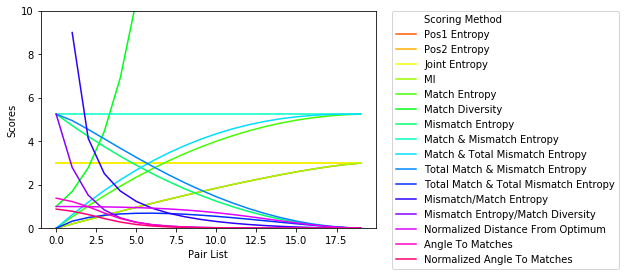

<Figure size 432x288 with 0 Axes>

In [101]:
# First test total single transversions to total double transversion
alphabet = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
pairs = []
pair_list = []
methods = ['Pos1 Entropy', 'Pos2 Entropy', 'Joint Entropy', 'MI', 'Match Entropy', 'Match Diversity', 'Mismatch Entropy',
           'Match & Mismatch Entropy', 'Match & Total Mismatch Entropy', 'Total Match & Mismatch Entropy',
           'Total Match & Total Mismatch Entropy', 'Mismatch/Match Entropy', 'Mismatch Entropy/Match Diversity',
           'Normalized Distance From Optimum', 'Angle To Matches', 'Normalized Angle To Matches'] * 20
scores = []
for i in range(20):
    curr_list = []
    for j in range(20):
        if j<= i:
            char1 = alphabet[j]
        else:
            char1 = alphabet[0]
        char2 = alphabet[j]
        curr_list.append(char1 + char2)
#     print(curr_list)
    pairs.append(curr_list)
    curr_scores = score_pairs_of_positions(curr_list, verbose=False)
    pair_list += [i] * len(curr_scores)
    scores += list(curr_scores)
# print(pairs)
print(len(pair_list))
print(len(methods))
print(len(scores))
single_to_double_transversion_df = pd.DataFrame({'Pair List': pair_list, 'Scoring Method': methods, 'Scores': scores})
ax = sns.lineplot(x='Pair List', y='Scores', hue='Scoring Method', data=single_to_double_transversion_df,
                  palette=sns.color_palette("hsv", 16))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join('/home/daniel/Desktop/', 'Single_To_Double_Transversion_Covariation_Metrics_All.png'), bbox_inches='tight', dpi=300)
ax.set_ylim((0.0, np.ceil(single_to_double_transversion_df.loc[single_to_double_transversion_df['Scoring Method'] != 'Match Diversity', 'Scores'].max())))
plt.savefig(os.path.join('/home/daniel/Desktop/', 'Single_To_Double_Transversion_Covariation_Metrics.png'), bbox_inches='tight', dpi=300)
plt.show()
plt.clf()

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


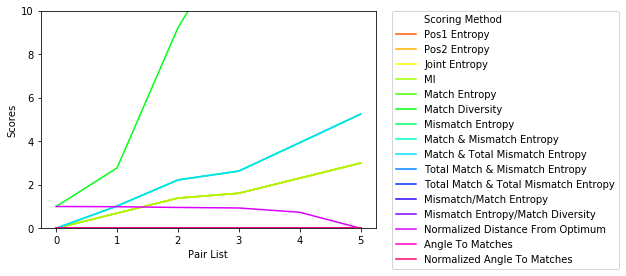

<Figure size 432x288 with 0 Axes>

In [102]:
# Second test scoring the difference between conservation and covariation
intervals = [20, 10, 5, 4, 2, 1]
pairs = []
pair_list = []
methods = ['Pos1 Entropy', 'Pos2 Entropy', 'Joint Entropy', 'MI', 'Match Entropy', 'Match Diversity', 'Mismatch Entropy',
           'Match & Mismatch Entropy', 'Match & Total Mismatch Entropy', 'Total Match & Mismatch Entropy',
           'Total Match & Total Mismatch Entropy', 'Mismatch/Match Entropy', 'Mismatch Entropy/Match Diversity',
           'Normalized Distance From Optimum', 'Angle To Matches', 'Normalized Angle To Matches'] * len(intervals)
scores = []
for counter in range(len(intervals)):
    itv = intervals[counter]
    curr_list = []
    for i in range(20):
        char = alphabet[i // itv]
        pair = char + char
        curr_list.append(pair)
#     print(curr_list)
    pairs.append(curr_list)
    curr_scores = score_pairs_of_positions(curr_list, verbose=False)
    pair_list += [counter] * len(curr_scores)
    scores += list(curr_scores)
# print(pairs)
conservation_to_covariation_df = pd.DataFrame({'Pair List': pair_list, 'Scoring Method': methods, 'Scores': scores})
ax = sns.lineplot(x='Pair List', y='Scores', hue='Scoring Method', data=conservation_to_covariation_df,
                  palette=sns.color_palette("hsv", 16))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join('/home/daniel/Desktop/', 'Conservation_To_Covariation_Covariation_Metrics_All.png'), bbox_inches='tight', dpi=300)
ax.set_ylim((0.0, np.ceil(single_to_double_transversion_df.loc[single_to_double_transversion_df['Scoring Method'] != 'Match Diversity', 'Scores'].max())))
plt.savefig(os.path.join('/home/daniel/Desktop/', 'Conservation_To_Covariation_Covariation_Metrics.png'), bbox_inches='tight', dpi=300)
plt.show()
plt.clf()

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


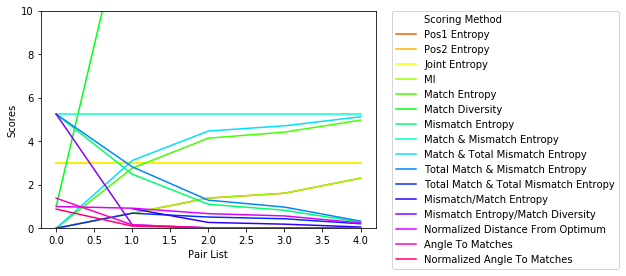

<Figure size 432x288 with 0 Axes>

In [103]:
# Third test scoring the difference between types of variability
intervals = [20, 10, 5, 4, 2]
pairs = []
pair_list = []
methods = ['Pos1 Entropy', 'Pos2 Entropy', 'Joint Entropy', 'MI', 'Match Entropy', 'Match Diversity', 'Mismatch Entropy',
           'Match & Mismatch Entropy', 'Match & Total Mismatch Entropy', 'Total Match & Mismatch Entropy',
           'Total Match & Total Mismatch Entropy', 'Mismatch/Match Entropy', 'Mismatch Entropy/Match Diversity',
           'Normalized Distance From Optimum', 'Angle To Matches', 'Normalized Angle To Matches'] * len(intervals)
scores = []
for counter in range(len(intervals)):
    itv = intervals[counter]
    curr_list = []
    for i in range(20):
        char = alphabet[i // itv]
        pair = char + alphabet[i]
        curr_list.append(pair)
#     print(curr_list)
    pairs.append(curr_list)
    curr_scores = score_pairs_of_positions(curr_list, verbose=False)
    pair_list += [counter] * len(curr_scores)
    scores += list(curr_scores)
# print(pairs)
levels_of_single_transversions_df = pd.DataFrame({'Pair List': pair_list, 'Scoring Method': methods, 'Scores': scores})
ax = sns.lineplot(x='Pair List', y='Scores', hue='Scoring Method', data=levels_of_single_transversions_df,
                  palette=sns.color_palette("hsv", 16))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join('/home/daniel/Desktop/', 'Levels_Of_Single_Covariation_Metrics_All.png'), bbox_inches='tight', dpi=300)
ax.set_ylim((0.0, np.ceil(single_to_double_transversion_df.loc[single_to_double_transversion_df['Scoring Method'] != 'Match Diversity', 'Scores'].max())))
plt.savefig(os.path.join('/home/daniel/Desktop/', 'Levels_Of_Single_Covariation_Metrics.png'), bbox_inches='tight', dpi=300)
plt.show()
plt.clf()

In [108]:
pair_1_521_535 = [['II', 'II', 'IV', 'II', 'II', 'II', 'II', 'II', 'VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VT', 'II', 'II'],
                  ['II', 'II', 'IV', 'II', 'II', 'II', 'II', 'II', 'VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VT'],
                  ['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VT'],
                  ['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM', 'VM', 'II'],
                  ['VM', 'VM', 'VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM', 'VM'],
                  ['VM', 'VM', 'VM'],
                  ['VM', 'VM'],
                  ['VM'],
                  ['VT'],
                  ['II', 'II', 'IV', 'II', 'II', 'II', 'II', 'II'],
                  ['II', 'II', 'IV'],
                  ['II', 'II', 'II', 'II', 'II'],
                  ['II', 'II', 'II', 'II'],
                  ['II', 'II'],
                  ['II'],
                  ['IV']]
for pair in pair_1_521_535:
    scores = score_pairs_of_positions(pair, verbose=False)
    print(pair)
    print(scores[-1])

['II', 'II', 'IV', 'II', 'II', 'II', 'II', 'II', 'VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VT', 'II', 'II']
0.03415716334739692
['II', 'II', 'IV', 'II', 'II', 'II', 'II', 'II', 'VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VT']
0.04374333774150573
['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VT']
0.08559169600038007
['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM']
0.0
['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM']
0.0
['VM', 'VM', 'VM', 'VM', 'II', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM', 'VM']
0.0
['VM', 'VM', 'VM', 'VM', 'II

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


In [109]:
pair_2_535_544 = [['IN', 'IN', 'VH', 'IN', 'IN', 'IN', 'IN', 'IN', 'MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'TP', 'IR', 'IR'],
                  ['IN', 'IN', 'VH', 'IN', 'IN', 'IN', 'IN', 'IN', 'MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'TP'],
                  ['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'TP'],
                  ['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK', 'MK', 'IR'],
                  ['MK', 'MK', 'MK', 'MK'],
                  ['MK', 'MK', 'MK'],
                  ['MK', 'MK'],
                  ['MK'],
                  ['TP'],
                  ['IR', 'IR'],
                  ['IR'],
                  ['IN', 'IN', 'VH', 'IN', 'IN', 'IN', 'IN', 'IN'],
                  ['IN', 'IN', 'VH'],
                  ['IN', 'IN', 'IN', 'IN', 'IN'],
                  ['IN', 'IN', 'IN', 'IN'],
                  ['IN', 'IN'],
                  ['IN'],
                  ['VH']]
for pair in pair_2_535_544:
    scores = score_pairs_of_positions(pair, verbose=False)
    print(pair)
    print(scores[-1])

['IN', 'IN', 'VH', 'IN', 'IN', 'IN', 'IN', 'IN', 'MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'TP', 'IR', 'IR']
0.015569799656460258
['IN', 'IN', 'VH', 'IN', 'IN', 'IN', 'IN', 'IN', 'MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'TP']
0.009157507973117618
['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'TP']
0.0
['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK']
0.0
['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK']
0.0
['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK', 'MK']
0.0
['MK', 'MK', 'MK', 'MK', 'IR', 'MK', 'MK',

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


In [112]:
pair_3_582_586 = [['AL', 'AL', 'AL', 'LL', 'LL', 'LL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'LL', 'LL', 'LL', 'LL'],
                  ['AL', 'AL', 'AL', 'LL', 'LL', 'LL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'LL', 'LL'],
                  ['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'LL', 'LL'],
                  ['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'LL'],
                  ['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL'],
                  ['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL'],
                  ['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL'],
                  ['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL'],
                  ['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL'],
                  ['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML'],
                  ['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL'],
                  ['AL', 'AL', 'AL', 'LL', 'LL', 'LL', 'LL', 'LL'],
                  ['AL', 'AL', 'AL'],
                  ['AL', 'AL'],
                  ['AL'],
                  ['LL', 'LL', 'LL', 'LL', 'LL'],
                  ['LL', 'LL', 'LL', 'LL'],
                  ['LL', 'LL'],
                  ['LL'],
                  ['IL', 'IL', 'IL', 'IL', 'LL'],
                  ['IL', 'LL'],
                  ['LL', 'ML'],
                  ['ML'],
                  ['IL', 'IL', 'IL', 'IL', 'IL', 'IL'],
                  ['IL', 'IL', 'IL', 'IL'],
                  ['IL', 'IL', 'IL'],
                  ['IL', 'IL'],
                  ['IL']]
for pair in pair_3_582_586:
    scores = score_pairs_of_positions(pair, verbose=False)
    print(pair)
    print(scores[-1])

['AL', 'AL', 'AL', 'LL', 'LL', 'LL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'LL', 'LL', 'LL', 'LL']
0.38219817442004866
['AL', 'AL', 'AL', 'LL', 'LL', 'LL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'LL', 'LL']
0.3884668982744433
['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'LL', 'LL']
0.30192106556064174
['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL', 'LL']
0.3153672468022713
['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL', 'IL', 'LL']
0.32943764967429606
['IL', 'IL', 'IL', 'IL', 'LL', 'IL', 'IL', 'IL', 'IL', 'IL', 'IL', 'LL', 'ML', 'IL', 'LL', 'LL', 'IL', 'IL', 'IL']
0.

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


In [114]:
pair_4_586_587 = [['LV', 'LV', 'LV', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV', 'LN', 'LN', 'LI', 'LV'],
                  ['LV', 'LV', 'LV', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV'],
                  ['LV', 'LV', 'LV', 'LN', 'LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LV'],
                  ['LV', 'LV', 'LV'],
                  ['LV', 'LV'],
                  ['LV'],
                  ['LI', 'LV'],
                  ['LI'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LN', 'LN', 'LN'],
                  ['LN', 'LN', 'LN'],
                  ['LN', 'LN'],
                  ['LN']]
for pair in pair_4_586_587:
    scores = score_pairs_of_positions(pair, verbose=False)
    print(pair)
    print(scores[-1])

['LV', 'LV', 'LV', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV', 'LN', 'LN', 'LI', 'LV']
0.29980991220384595
['LV', 'LV', 'LV', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV', 'LN', 'LN']
0.21735179842520722
['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV', 'LN', 'LN']
0.1377564125897096
['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV', 'LN']
0.13534240857753335
['LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LN', 'LV']
0.12845070630124183
['LV', 'LV', 'LV', 'LN', 'LN', 'LN', 'LN', 'LN']
0.11474521107821592
['LN', 'LV']
0.0
['LV', 'LV', 'LV']
0.0
['LV', 

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


In [115]:
pair_5_524_564 = [['DV', 'EI', 'EI', 'GI', 'GI', 'GI', 'GI', 'GI', 'EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV', 'NV', 'NV', 'EV', 'EV'],
                  ['DV', 'EI', 'EI', 'GI', 'GI', 'GI', 'GI', 'GI', 'EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV', 'NV', 'NV'],
                  ['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV', 'NV', 'NV'],
                  ['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV', 'NV'],
                  ['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV'],
                  ['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV'],
                  ['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV'],
                  ['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV'],
                  ['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI'],
                  ['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV'],
                  ['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV'],
                  ['DV', 'DV', 'EV', 'DV', 'EV', 'DV'],
                  ['EV', 'EV', 'EV', 'DV', 'DV'],
                  ['DV', 'DV', 'EV', 'DV'],
                  ['EV', 'EV', 'EV', 'DV'],
                  ['DV', 'DV', 'EV'],
                  ['EV', 'EV', 'EV'],
                  ['DV', 'DV'],
                  ['EV', 'EV'],
                  ['EV', 'DV'],
                  ['EV'],
                  ['DV', 'EI', 'EI', 'GI', 'GI', 'GI', 'GI', 'GI'],
                  ['DV', 'EI', 'EI'],
                  ['GI', 'GI', 'GI', 'GI', 'GI'],
                  ['GI', 'GI', 'GI', 'GI'],
                  ['GI', 'GI'],
                  ['GI'],
                  ['DV', 'EI'],
                  ['EI'],
                  ['DV'],
                  ['NV', 'RV'],
                  ['NV'],
                  ['RV']]
for pair in pair_5_524_564:
    scores = score_pairs_of_positions(pair, verbose=False)
    print(pair)
    print(scores[-1])

['DV', 'EI', 'EI', 'GI', 'GI', 'GI', 'GI', 'GI', 'EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV', 'NV', 'NV', 'EV', 'EV']
0.19024726723142035
['DV', 'EI', 'EI', 'GI', 'GI', 'GI', 'GI', 'GI', 'EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV', 'NV', 'NV']
0.17867255986936884
['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV', 'NV', 'NV']
0.3867533893861128
['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV', 'NV']
0.3815427814455108
['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV', 'NV', 'RV']
0.36424150311839654
['EV', 'EV', 'EV', 'DV', 'DV', 'DV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EV', 'DV', 'EI', 'EV', 'EV', 'EV', 'EV', 'EV']
0.

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


In [118]:
pair_6_500_502 = [['RC', 'KV', 'KV', 'VA', 'VA', 'VA', 'VA', 'VA', 'VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV', 'VA', 'MV', 'EV', 'EV'],
                  ['RC', 'KV', 'KV', 'VA', 'VA', 'VA', 'VA', 'VA', 'VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV', 'VA', 'MV'],
                  ['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV', 'VA', 'MV'],
                  ['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV', 'VA'],
                  ['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV'],
                  ['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV'],
                  ['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV'],
                  ['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI'],
                  ['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV'],
                  ['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV'],
                  ['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI'],
                  ['EV', 'EV'],
                  ['EV'],
                  ['RC', 'KV', 'KV', 'VA', 'VA', 'VA', 'VA', 'VA'],
                  ['RC', 'KV', 'KV'],
                  ['RC', 'KV'],
                  ['RC'],
                  ['KV'],
                  ['VA', 'VA', 'VA', 'VA', 'VA'],
                  ['VA', 'VA', 'VA', 'VA'],
                  ['VA', 'VA'],
                  ['VA', 'VA'],
                  ['VA'],
                  ['LV', 'IV'],
                  ['LV'],
                  ['IV'],
                  ['LV', 'XV'],
                  ['XV'],
                  ['VV', 'VI', 'VV', 'IA', 'VV', 'VI'],
                  ['VV', 'VI', 'VV', 'IA'],
                  ['VV', 'VI', 'VV'],
                  ['VV', 'VI'],
                  ['VI', 'VV'],
                  ['IA'],
                  ['VV', 'VI'],
                  ['VI', 'VI', 'VI', 'VI', 'LV'],
                  ['VI', 'VI', 'VI', 'VI'],
                  ['VI', 'VI', 'VI'],
                  ['VI', 'VI'],
                  ['VI'],
                  ['VV'],
                  ['MV']]
for pair in pair_6_500_502:
    scores = score_pairs_of_positions(pair, verbose=False)
    print(pair)
    print(scores[-1])

['RC', 'KV', 'KV', 'VA', 'VA', 'VA', 'VA', 'VA', 'VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV', 'VA', 'MV', 'EV', 'EV']
0.13843822381241042
['RC', 'KV', 'KV', 'VA', 'VA', 'VA', 'VA', 'VA', 'VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV', 'VA', 'MV']
0.14107073776283943
['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV', 'VA', 'MV']
0.17848420941329568
['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV', 'VA']
0.17768486732019392
['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV', 'LV', 'IV']
0.157105754852379
['VI', 'VI', 'VI', 'VI', 'LV', 'VV', 'VI', 'VV', 'IA', 'VV', 'VI', 'VI', 'VV', 'VV', 'VI', 'VI', 'VV', 'LV', 'XV']
0.

/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
/home/daniel/anaconda3/envs/PyET3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars



['VA', 'VA']
0.0
['VA', 'VA']
0.0
['VA']
0.0
['LV', 'IV']
0.0
['LV']
0.0
['IV']
0.0
['LV', 'XV']
0.0
['XV']
0.0
['VV', 'VI', 'VV', 'IA', 'VV', 'VI']
0.10543087015243509
['VV', 'VI', 'VV', 'IA']
0.14264610356795593
['VV', 'VI', 'VV']
0.2991392181645593
['VV', 'VI']
0.0
['VI', 'VV']
0.0
['IA']
0.0
['VV', 'VI']
0.0
['VI', 'VI', 'VI', 'VI', 'LV']
0.0
['VI', 'VI', 'VI', 'VI']
0.0
['VI', 'VI', 'VI']
0.0
['VI', 'VI']
0.0
['VI']
0.0
['VV']
0.0
['MV']
0.0
